# Yash Meshram
# The Spark Foundation
# Data Science & Business Analytics

# Task
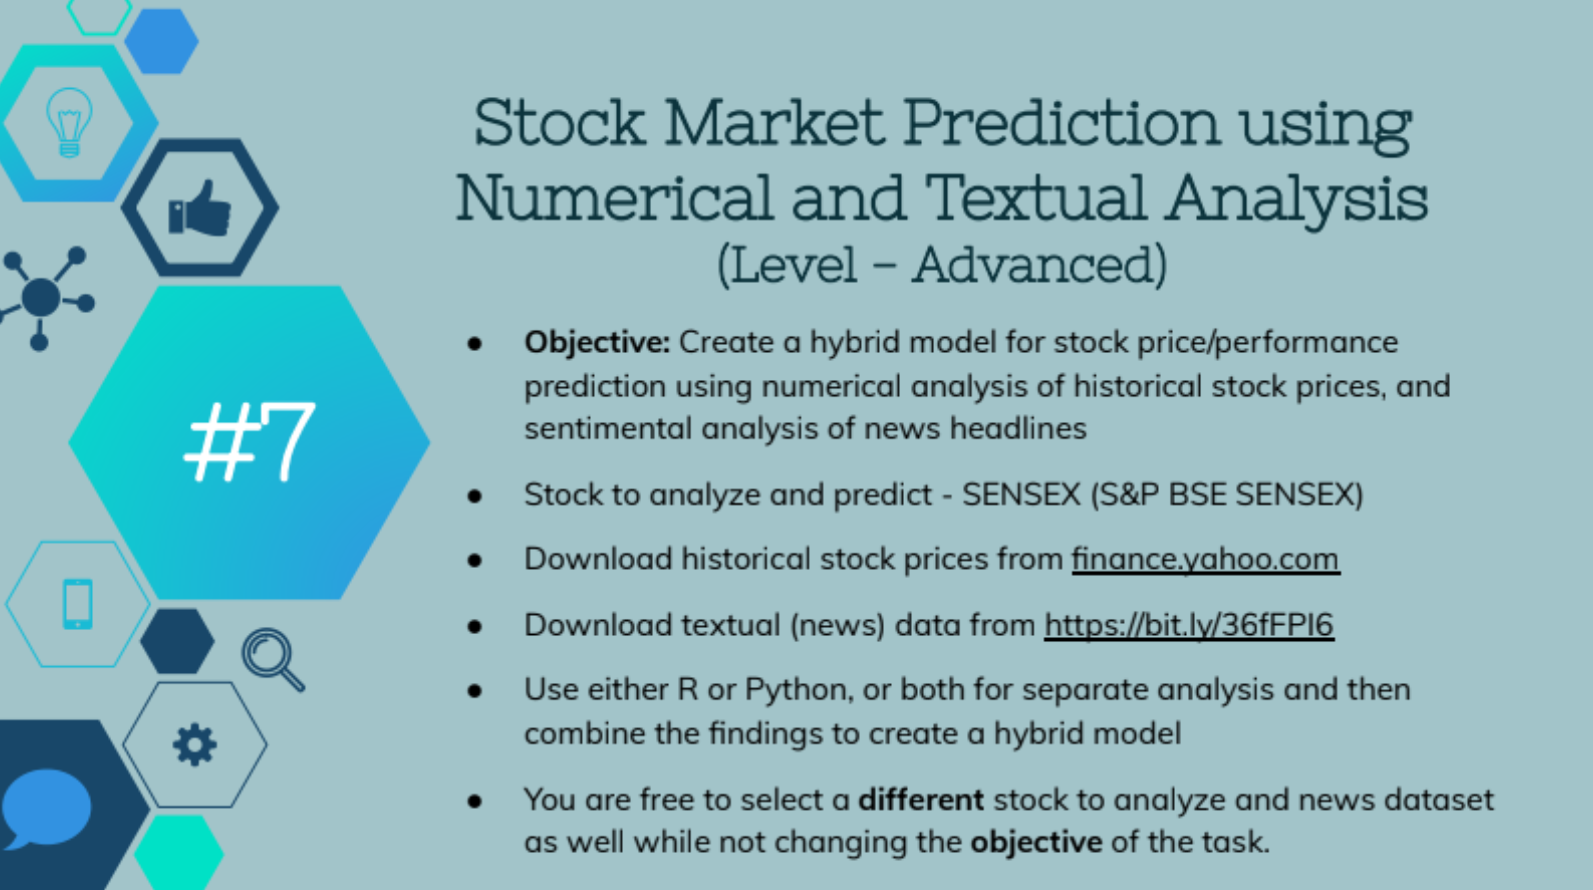

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, LSTM

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

%matplotlib inline
plt.style.use('default')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/The Spark Foundation (Internship)/Stock Market Prediction using Numerical and Textual Analysis

/content/drive/MyDrive/Colab Notebooks/The Spark Foundation (Internship)/Stock Market Prediction using Numerical and Textual Analysis


In [4]:
df_d = pd.read_csv('SENSEX (S&P BSE SENSEX).csv')
df_h = pd.read_csv('india-news-headlines.csv')

# Analysing the SENSEX data

In [5]:
df = df_d.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

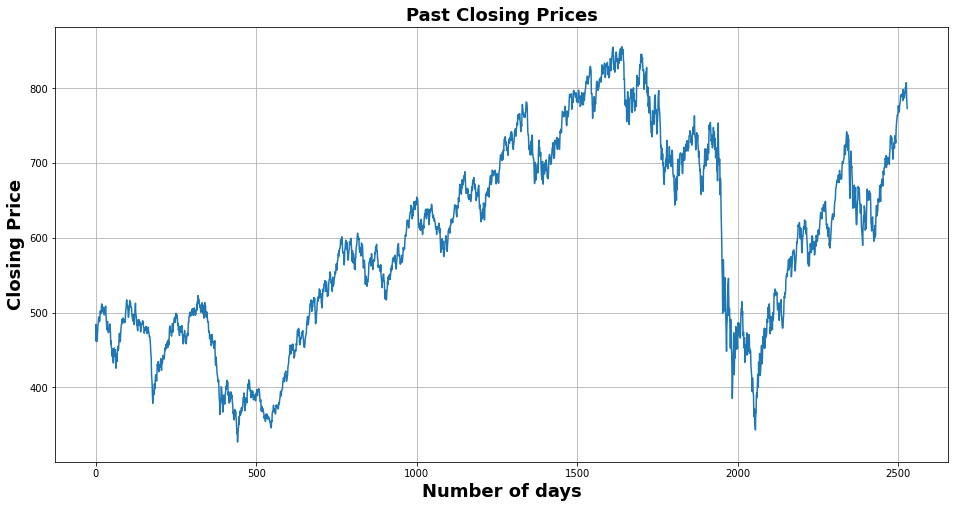

In [7]:
# Visualizing the closing prise
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel("Number of days", fontsize = 18, fontweight = 'bold')
plt.ylabel("Closing Price", fontsize = 18, fontweight = 'bold')
plt.title("Past Closing Prices", fontsize = 18, fontweight = 'bold')
plt.grid(True)

In [8]:
# create a new df with only close price
data = df.filter(['Close'])
data

,Close
0,462.489990
1,484.390015
2,477.200012
3,463.140015
4,461.640015
...,...
2524,807.570007
2525,807.559998
2526,786.890015
2527,778.080017


In [9]:
# convert this data into numpy array
# p = np.array(data)
# p

dataset = data.values
dataset

array([[462.48999 ],
       [484.390015],
       [477.200012],
       ...,
       [786.890015],
       [778.080017],
       [773.179993]])

In [10]:
# number of training data
training_data_len = math.ceil(len(dataset)*0.8)      # 80 % training data
training_data_len

2024

In [11]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.25617986],
       [0.29759991],
       [0.28400129],
       ...,
       [0.86972556],
       [0.853063  ],
       [0.84379546]])

In [12]:
# create a training dataset
train_data = scaled_data[0:training_data_len, :]
train_data

array([[0.25617986],
       [0.29759991],
       [0.28400129],
       ...,
       [0.26366955],
       [0.20163407],
       [0.24534261]])

In [13]:
# make x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.25617986, 0.29759991, 0.28400129, 0.25740927, 0.25457228,
       0.25894124, 0.28069147, 0.29659746, 0.30017209, 0.31441376,
       0.31475418, 0.31696706, 0.30459778, 0.3084939 , 0.33101959,
       0.33137894, 0.32523214, 0.3246269 , 0.34208384, 0.34917631,
       0.3428971 , 0.34403191, 0.32996045, 0.32852302, 0.33801751,
       0.34051401, 0.33258942, 0.32154403, 0.33724206, 0.33198418,
       0.33372416, 0.34386169, 0.32576171, 0.31036635, 0.29593554,
       0.28411476, 0.28447412, 0.30501387, 0.28693282, 0.27864881,
       0.27662508, 0.28339605, 0.28133451, 0.29143418, 0.29845097,
       0.29211503, 0.27728705, 0.24844435, 0.25574489, 0.23953623,
       0.23664251, 0.21704835, 0.2349592 , 0.22211715, 0.20558693,
       0.20002643, 0.2198286 , 0.22760198, 0.23800426, 0.21780493])]
[0.21653771796206978]

[array([0.25617986, 0.29759991, 0.28400129, 0.25740927, 0.25457228,
       0.25894124, 0.28069147, 0.29659746, 0.30017209, 0.31441376,
       0.31475418, 0.31696706, 0.30

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train, y_train

(array([[0.25617986, 0.29759991, 0.28400129, ..., 0.22760198, 0.23800426,
         0.21780493],
        [0.29759991, 0.28400129, 0.25740927, ..., 0.23800426, 0.21780493,
         0.21653772],
        [0.28400129, 0.25740927, 0.25457228, ..., 0.21780493, 0.21653772,
         0.23355964],
        ...,
        [0.3850926 , 0.33084937, 0.30805893, ..., 0.27755186, 0.23855276,
         0.25642574],
        [0.33084937, 0.30805893, 0.272502  , ..., 0.23855276, 0.25642574,
         0.26366955],
        [0.30805893, 0.272502  , 0.22953111, ..., 0.25642574, 0.26366955,
         0.20163407]]),
 array([0.21653772, 0.23355964, 0.21319009, ..., 0.26366955, 0.20163407,
        0.24534261]))

In [16]:
x_train.shape , y_train.shape

((1964, 60), (1964,))

In [17]:
#LSTM requires the 3-D data(no. of samples, no. of times space, no. of features) and our data is 2-D
# So we have to reshape it
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1964, 60, 1)

In [18]:
# Build LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=2)

1964/1964 - 60s - loss: 0.0019


In [21]:
# create a test data
test_data = scaled_data[training_data_len-60: , :]
#create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [22]:
# convert the data into numpy array
x_test = np.array(x_test)

In [23]:
x_test.shape, y_test.shape

((505, 60), (505, 1))

In [24]:
# reshaping the data since LSTM requires 3-D data not 2-D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(505, 60, 1)

In [25]:
# predict the closed price
predictions = model.predict(x_test)
# unscale the values
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


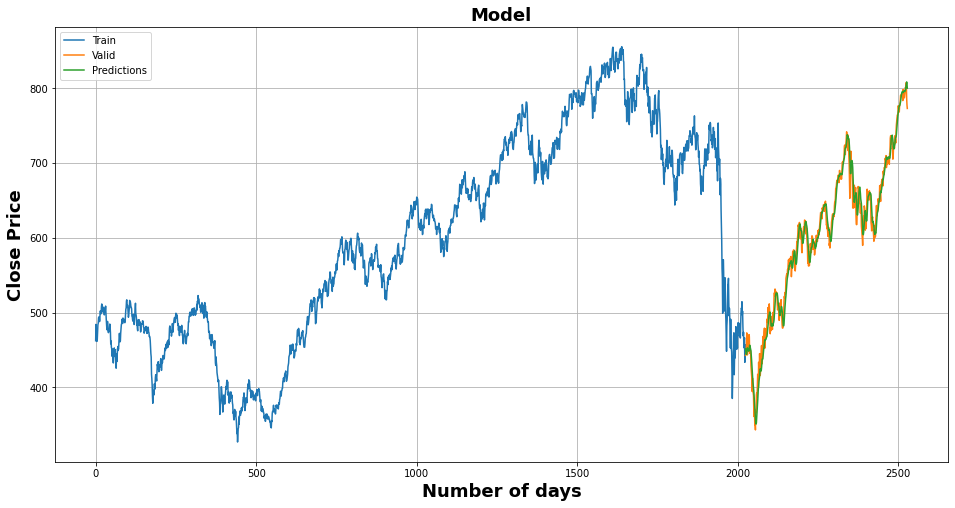

In [26]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title("Model", fontsize=18, fontweight = 'bold')
plt.xlabel("Number of days", fontsize=18, fontweight = 'bold')
plt.ylabel("Close Price", fontsize=18, fontweight = 'bold')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'upper left')
plt.grid(True)
plt.show()

In [27]:
df_d.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000
5,2001-01-09,461.640015,466.399994,461.390015,463.950012,463.950012,1191300000
6,2001-01-10,463.950012,475.450012,461.540009,475.450012,475.450012,1296500000
7,2001-01-11,475.450012,484.529999,474.450012,483.859985,483.859985,1411200000
8,2001-01-12,483.839996,487.679993,480.170013,485.750000,485.750000,1276000000
9,2001-01-16,485.750000,493.459991,483.859985,493.279999,493.279999,1205700000


In [28]:
label = []
for i in range(1):
    if df_d.iloc[i]['Open'] > df_d.iloc[i]['Close']:
        label.append(0)
    else:
        label.append(1)

for i in range(1, df_d.shape[0]):
    if df_d.iloc[i]['Close'] < df_d.iloc[i-1]['Close']:
        label.append(0)
    else:
        label.append(1)

In [29]:
df_d['Label'] = label
df_d.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0
5,2001-01-09,461.640015,466.399994,461.390015,463.950012,463.950012,1191300000,1
6,2001-01-10,463.950012,475.450012,461.540009,475.450012,475.450012,1296500000,1
7,2001-01-11,475.450012,484.529999,474.450012,483.859985,483.859985,1411200000,1
8,2001-01-12,483.839996,487.679993,480.170013,485.750000,485.750000,1276000000,1
9,2001-01-16,485.750000,493.459991,483.859985,493.279999,493.279999,1205700000,1


# Sentimental Analysing

In [30]:
df_h.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [31]:
df_h.groupby('publish_date')['publish_date'].agg('count').sort_values(ascending = True)

publish_date
20010309      1
20010313      1
20010305      1
20010302      1
20010525      1
           ... 
20141109    705
20141011    705
20141221    706
20141010    706
20141215    706
Name: publish_date, Length: 7262, dtype: int64

In [32]:
df_h['publish_date']=pd.to_datetime(df_h['publish_date'],format='%Y%m%d')
df_h

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [33]:
df_h = df_h.drop_duplicates('publish_date', keep='first').sort_index()
df_h = df_h.reset_index()
df_h

,index,publish_date,headline_category,headline_text
0,0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,2001-01-03,unknown,Powerless north India gropes in the dark
2,127,2001-01-04,unknown,The string that pulled Stephen Hawking to India
3,280,2001-01-05,unknown,Light combat craft takes India into club class
4,406,2001-01-06,unknown,Light combat craft takes India into club class
...,...,...,...,...
7257,3421573,2020-12-27,entertainment.bengali.movies.news,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,3422072,2020-12-28,astrology.horoscope,Horoscope Today; 28 December 2020: Check astro...
7259,3422570,2020-12-29,city.bareilly,Man recovers charred remains of 'thief' from h...
7260,3423069,2020-12-30,astrology.numerology-tarot,Numerology Readings 30 December 2020: Predicti...


In [34]:
from textblob import TextBlob

df_h['sentiment'] = df_h['headline_text'].apply(lambda x: TextBlob(x).sentiment[0] )
df_h[['headline_text','sentiment']].head()

,headline_text,sentiment
0,Status quo will not be disturbed at Ayodhya; s...,0.000
1,Powerless north India gropes in the dark,-0.325
2,The string that pulled Stephen Hawking to India,0.000
3,Light combat craft takes India into club class,0.400
4,Light combat craft takes India into club class,0.400


In [35]:
df_h = df_h.drop('index', axis = 1)
df_h

,publish_date,headline_category,headline_text,sentiment
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000000
1,2001-01-03,unknown,Powerless north India gropes in the dark,-0.325000
2,2001-01-04,unknown,The string that pulled Stephen Hawking to India,0.000000
3,2001-01-05,unknown,Light combat craft takes India into club class,0.400000
4,2001-01-06,unknown,Light combat craft takes India into club class,0.400000
...,...,...,...,...
7257,2020-12-27,entertainment.bengali.movies.news,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.000000
7258,2020-12-28,astrology.horoscope,Horoscope Today; 28 December 2020: Check astro...,-0.125000
7259,2020-12-29,city.bareilly,Man recovers charred remains of 'thief' from h...,0.000000
7260,2020-12-30,astrology.numerology-tarot,Numerology Readings 30 December 2020: Predicti...,0.333333


# Numerical and Textual Analysis

In [36]:
df_h = df_h[(df_h['publish_date'] >= df_d['Date'][0]) & (df_h['publish_date'] <= df_d['Date'][len(df_d.Date)-1])]
df_h

,publish_date,headline_category,headline_text,sentiment
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000000
1,2001-01-03,unknown,Powerless north India gropes in the dark,-0.325000
2,2001-01-04,unknown,The string that pulled Stephen Hawking to India,0.000000
3,2001-01-05,unknown,Light combat craft takes India into club class,0.400000
4,2001-01-06,unknown,Light combat craft takes India into club class,0.400000
...,...,...,...,...
3625,2011-01-17,city.bengaluru,Older brother in the dark about sibling's death,0.008333
3626,2011-01-18,life-style.relationships.man-woman,Top sex mistakes men make,0.500000
3627,2011-01-19,entertainment.hindi.bollywood,My ex doesn't want me: Pratik,0.000000
3628,2011-01-20,entertainment.hindi.bollywood,Neetu Chandra denies going panty-less!,0.000000


In [37]:
df_h.rename(columns={'publish_date': 'Date'},inplace = True)
df_h.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,headline_category,headline_text,sentiment
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000
1,2001-01-03,unknown,Powerless north India gropes in the dark,-0.325
2,2001-01-04,unknown,The string that pulled Stephen Hawking to India,0.000
3,2001-01-05,unknown,Light combat craft takes India into club class,0.400
4,2001-01-06,unknown,Light combat craft takes India into club class,0.400


In [38]:
df_d['Date']=pd.to_datetime(df_d['Date']) 
df_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0


In [39]:
Data = pd.merge(df_d, df_h, on='Date', how='left')
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Label,headline_category,headline_text,sentiment
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1,unknown,Powerless north India gropes in the dark,-0.325
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0,unknown,The string that pulled Stephen Hawking to India,0.000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0,unknown,Light combat craft takes India into club class,0.400
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0,unknown,Sangh Parivar; Babri panel up the ante,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000,1,leisure,Cartoons,0.000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000,0,life-style.relationships.man-woman,Top sex mistakes men make,0.500
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000,0,entertainment.hindi.bollywood,My ex doesn't want me: Pratik,0.000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000,0,entertainment.hindi.bollywood,Neetu Chandra denies going panty-less!,0.000


In [40]:
analyzer = SentimentIntensityAnalyzer()
Data['scores'] = Data['headline_text'].apply(lambda x: analyzer.polarity_scores(str(x)))
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,headline_category,headline_text,sentiment,scores
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1,unknown,Powerless north India gropes in the dark,-0.325,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp..."
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0,unknown,The string that pulled Stephen Hawking to India,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0,unknown,Light combat craft takes India into club class,0.400,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp..."
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0,unknown,Sangh Parivar; Babri panel up the ante,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [41]:
Data.scores[0]

{'compound': 0.2924, 'neg': 0.0, 'neu': 0.805, 'pos': 0.195}

In [42]:
Data['compound']=Data['scores'].apply(lambda scores: scores['compound']) 
Data['positive']=Data['scores'].apply(lambda scores: scores['pos'])
Data['negative']=Data['scores'].apply(lambda scores: scores['neg']) 
Data['neutral']=Data['scores'].apply(lambda scores: scores['neu'])

Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,headline_category,headline_text,sentiment,scores,compound,positive,negative,neutral
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.2924,0.195,0.000,0.805
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1,unknown,Powerless north India gropes in the dark,-0.325,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp...",-0.4939,0.000,0.348,0.652
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0,unknown,The string that pulled Stephen Hawking to India,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0,unknown,Light combat craft takes India into club class,0.400,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400,0.000,0.255,0.745
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0,unknown,Sangh Parivar; Babri panel up the ante,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000


In [43]:
Data = Data.drop('scores', axis='columns')
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,headline_category,headline_text,sentiment,compound,positive,negative,neutral
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000,0.2924,0.195,0.000,0.805
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1,unknown,Powerless north India gropes in the dark,-0.325,-0.4939,0.000,0.348,0.652
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0,unknown,The string that pulled Stephen Hawking to India,0.000,0.0000,0.000,0.000,1.000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0,unknown,Light combat craft takes India into club class,0.400,-0.3400,0.000,0.255,0.745
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0,unknown,Sangh Parivar; Babri panel up the ante,0.000,0.0000,0.000,0.000,1.000


In [44]:
Data.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Label                 0
headline_category    28
headline_text        28
sentiment            28
compound              0
positive              0
negative              0
neutral               0
dtype: int64

In [45]:
Data.shape

(2529, 15)

In [46]:
Data = Data.dropna()
Data

,Date,Open,High,Low,Close,Adj Close,Volume,Label,headline_category,headline_text,sentiment,compound,positive,negative,neutral
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,0,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000,0.2924,0.195,0.000,0.805
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,1,unknown,Powerless north India gropes in the dark,-0.325,-0.4939,0.000,0.348,0.652
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0,unknown,The string that pulled Stephen Hawking to India,0.000,0.0000,0.000,0.000,1.000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0,unknown,Light combat craft takes India into club class,0.400,-0.3400,0.000,0.255,0.745
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,0,unknown,Sangh Parivar; Babri panel up the ante,0.000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000,1,leisure,Cartoons,0.000,0.0000,0.000,0.000,1.000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000,0,life-style.relationships.man-woman,Top sex mistakes men make,0.500,-0.1779,0.247,0.342,0.411
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000,0,entertainment.hindi.bollywood,My ex doesn't want me: Pratik,0.000,-0.0572,0.000,0.196,0.804
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000,0,entertainment.hindi.bollywood,Neetu Chandra denies going panty-less!,0.000,-0.4753,0.000,0.436,0.564


In [47]:
Data.isna().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Label                0
headline_category    0
headline_text        0
sentiment            0
compound             0
positive             0
negative             0
neutral              0
dtype: int64

In [48]:
Data.shape

(2501, 15)

In [49]:
Data = Data.drop(['Date', 'Adj Close', 'headline_category', 'headline_text'], axis = 'columns')
Data

,Open,High,Low,Close,Volume,Label,sentiment,compound,positive,negative,neutral
0,483.549988,483.549988,461.380005,462.489990,1129400000,0,0.000,0.2924,0.195,0.000,0.805
1,462.489990,484.390015,459.279999,484.390015,188070000,1,-0.325,-0.4939,0.000,0.348,0.652
2,484.390015,484.390015,475.899994,477.200012,216940000,0,0.000,0.0000,0.000,0.000,1.000
3,477.200012,477.309998,461.760010,463.140015,1430800000,0,0.400,-0.3400,0.000,0.255,0.745
4,463.140015,463.140015,457.559998,461.640015,1115500000,0,0.000,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...
2524,800.650024,807.890015,799.049988,807.570007,4661590000,1,0.000,0.0000,0.000,0.000,1.000
2525,807.570007,807.659973,801.039978,807.559998,5284990000,0,0.500,-0.1779,0.247,0.342,0.411
2526,806.679993,807.210022,785.849976,786.890015,4743710000,0,0.000,-0.0572,0.000,0.196,0.804
2527,781.960022,785.780029,775.580017,778.080017,4935320000,0,0.000,-0.4753,0.000,0.436,0.564


In [50]:
x = Data.drop('Label', axis = 'columns')
x.head()

,Open,High,Low,Close,Volume,sentiment,compound,positive,negative,neutral
0,483.549988,483.549988,461.380005,462.489990,1129400000,0.000,0.2924,0.195,0.000,0.805
1,462.489990,484.390015,459.279999,484.390015,188070000,-0.325,-0.4939,0.000,0.348,0.652
2,484.390015,484.390015,475.899994,477.200012,216940000,0.000,0.0000,0.000,0.000,1.000
3,477.200012,477.309998,461.760010,463.140015,1430800000,0.400,-0.3400,0.000,0.255,0.745
4,463.140015,463.140015,457.559998,461.640015,1115500000,0.000,0.0000,0.000,0.000,1.000


In [51]:
y = Data['Label']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Label, dtype: int64

In [54]:
model = RandomForestClassifier(n_estimators=500)

Maximum Accuracy : 81.84 %
Random state value for max. accuracy : 3


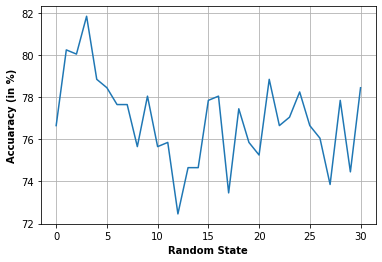

In [55]:
score = []
Range = range(31)
for i in Range:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i) 
    model.fit(x_train, y_train)
    score.append(model.score(x_test, y_test)*100)

plt.plot(Range, score)
plt.grid(True)
plt.xlabel('Random State', fontweight = 'bold')
plt.ylabel('Accuaracy (in %)', fontweight = 'bold')

print('Maximum Accuracy : {} %'.format(round(np.amax(score), 2)))
print('Random state value for max. accuracy :',np.argmax(score))

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = np.argmax(score))

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy : {}%'.format(round(accuracy_score(y_test,y_pred)*100, 2)))
print('Mean Squared Error : {}'.format(round(mean_squared_error(y_test,y_pred), 2)))

Accuracy : 82.24%
Mean Squared Error : 0.18
